<a href="https://colab.research.google.com/github/weisurya/full-stack-deep-learning-spring-2021/blob/main/01_Deep_Learning_Fuldamentals_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Colab Environment

In [1]:
!python --version

Python 3.6.9


In [2]:
!pip list | grep tensor

tensorboard                   2.4.1          
tensorboard-plugin-wit        1.8.0          
tensorboardcolab              0.0.22         
tensorflow                    2.4.1          
tensorflow-addons             0.8.3          
tensorflow-datasets           4.0.1          
tensorflow-estimator          2.4.0          
tensorflow-gcs-config         2.4.0          
tensorflow-hub                0.11.0         
tensorflow-metadata           0.27.0         
tensorflow-privacy            0.2.2          
tensorflow-probability        0.12.1         


In [3]:
!pip list | grep torch

torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    


In [4]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Basic Numerical Computing

In [5]:
import numpy as np

In [6]:
# Initialize a numpy ndarray with 3 rows and 2 columns
X = np.zeros((3,2))

print(X)

print(X.shape, X.dtype)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
(3, 2) float64


In [7]:
# Set value of a whole row
X[0, :] = 1
print(X)

# Set value of a whole column
X[:, 0] = 2
print(X)

[[1. 1.]
 [0. 0.]
 [0. 0.]]
[[2. 1.]
 [2. 0.]
 [2. 0.]]


In [8]:
X = np.array([
    [1,2],
    [3,4],
    [5,6],
])

print(X)

[[1 2]
 [3 4]
 [5 6]]


In [9]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [10]:
# Element-wise multiplication
X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [11]:
# Matrix multiplication
x = np.array([[10, 20], ]).T
print(X @ x)
print(np.dot(X, x))

[[ 50]
 [110]
 [170]]
[[ 50]
 [110]
 [170]]


## Indexing

In [12]:
X = np.random.rand(3,2)
X

array([[0.08040671, 0.71220371],
       [0.01945869, 0.41857553],
       [0.83082605, 0.96414964]])

In [13]:
X > .5

array([[False,  True],
       [False, False],
       [ True,  True]])

In [14]:
X[X > .5] = 1
X

array([[0.08040671, 1.        ],
       [0.01945869, 0.41857553],
       [1.        , 1.        ]])

# Basic Plotting

In [15]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

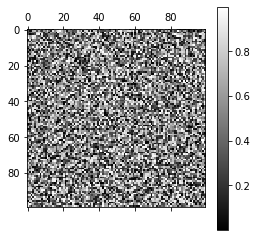

In [16]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

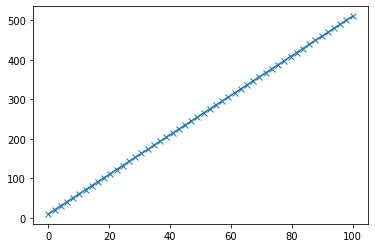

In [17]:
x = np.linspace(0, 100)
y = x * 5 + 10 # y = x * w + b

plt.plot(x, y, 'x-')

## Basic Regression with a Linear Model

In [18]:
# x is 1-dimensional
n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f"x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}")

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


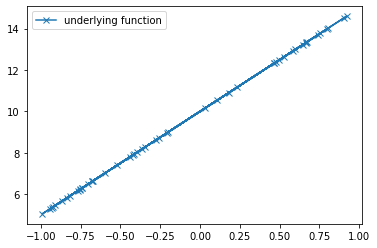

In [19]:
plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

## Basic Prediction Function: Linear

In [20]:
class Linear:
    def __init__(self, input_dim, num_hidden=1):

        self.weights = np.random.rand(input_dim, num_hidden) * np.sqrt(2. / input_dim)
        self.bias = np.zeros(1)

    def __call__(self, x):

        return x @ self.weights + self.bias

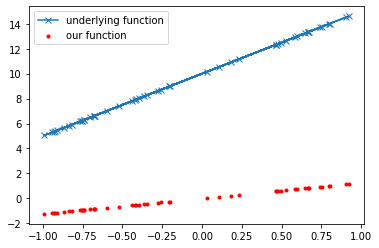

In [21]:
linear = Linear(d)
y_pred = linear(x)

plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

## Basic Loss Function: MSE

In [22]:
# To see how wrong those initial predictions

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true

        return((y_true - y_pred) ** 2).mean()

In [23]:
loss = MSE()
print(f"Out initial loss is {loss(y_pred, y_true)}")

Out initial loss is 96.2457915798122


## Add Backpropagation

In [24]:
# Use gradient descent to learn the weights and bias that minimized the loss function

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true

        return((y_true - y_pred) ** 2).mean()

    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        print(f"MSE backward: {self.y_pred.shape}, {self.y_true.shape}, {self.gradient.shape}}}")
        
        return self.gradient

class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
        self.bias = np.zeros((1))

    def __call__(self, x):
        self.x = x
        output = x @ self.weights + self.bias
        print(f"Linear forward: {x.shape}, {self.weights.shape}, {output.shape}")

        return output

    def backward(self, gradient):
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum()
        self.x_gradient = gradient @ self.weights.T

        return self.x_gradient

    def update(self, learning_rate):
        self.weights = self.weights - learning_rate * self.weights_gradient
        self.bias = self.bias - learning_rate * self.bias_gradient

In [25]:
# Take 1-step forward, and 1-step backward to make sure nothing breaks. And that the loss decreases

loss = MSE()
linear = Linear(d)

y_pred = linear(x)
print(loss(y_pred, y_true))

loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)

y_pred = linear(x)
print(loss(y_pred, y_true))

Linear forward: (50, 1), (1, 1), (50, 1)
100.41599160081167
MSE backward: (50, 1), (50, 1), (50, 1)}
Linear forward: (50, 1), (1, 1), (50, 1)
69.17909822695559


## Train using Gradient Descent

Linear forward: (50, 1), (1, 1), (50, 1)
Epoch: 0, loss: 99.73240114679638
MSE backward: (50, 1), (50, 1), (50, 1)}
Linear forward: (50, 1), (1, 1), (50, 1)
MSE backward: (50, 1), (50, 1), (50, 1)}
Linear forward: (50, 1), (1, 1), (50, 1)
MSE backward: (50, 1), (50, 1), (50, 1)}
Linear forward: (50, 1), (1, 1), (50, 1)
MSE backward: (50, 1), (50, 1), (50, 1)}
Linear forward: (50, 1), (1, 1), (50, 1)
MSE backward: (50, 1), (50, 1), (50, 1)}
Linear forward: (50, 1), (1, 1), (50, 1)
Epoch: 5, loss: 18.52690201934634
MSE backward: (50, 1), (50, 1), (50, 1)}
Linear forward: (50, 1), (1, 1), (50, 1)
MSE backward: (50, 1), (50, 1), (50, 1)}
Linear forward: (50, 1), (1, 1), (50, 1)
MSE backward: (50, 1), (50, 1), (50, 1)}
Linear forward: (50, 1), (1, 1), (50, 1)
MSE backward: (50, 1), (50, 1), (50, 1)}
Linear forward: (50, 1), (1, 1), (50, 1)
MSE backward: (50, 1), (50, 1), (50, 1)}
Linear forward: (50, 1), (1, 1), (50, 1)
Epoch: 10, loss: 5.64664255962351
MSE backward: (50, 1), (50, 1), (50, 

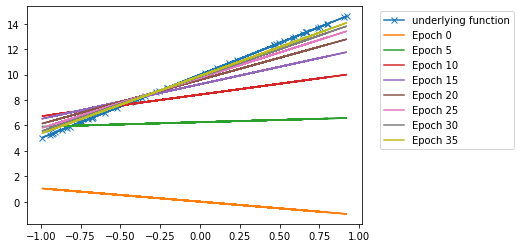

In [26]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

n_epochs = 40
learning_rate = 0.1

for epoch in range(n_epochs):
    y_pred = linear(x)
    loss_value = loss(y_pred, y_true)

    if epoch % 5 == 0:
        print(f"Epoch: {epoch}, loss: {loss_value}")
        plt.plot(x, y_pred.squeeze(), label=f"Epoch {epoch}")

    gradient_from_loss = loss.backward()
    linear.backward(gradient_from_loss)
    linear.update(learning_rate)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

## 2D Inputs Work

In [27]:
# 2D x
n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f"x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}")

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


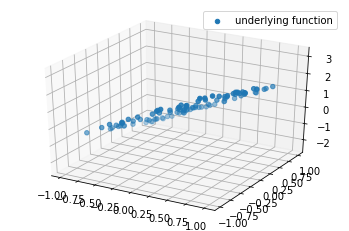

In [28]:
def plot_3d(x, y, y_pred=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')

    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
    
    plt.legend()

plot_3d(x, y_true)

Linear forward: (100, 2), (2, 1), (100, 1)
2.0326669162509368


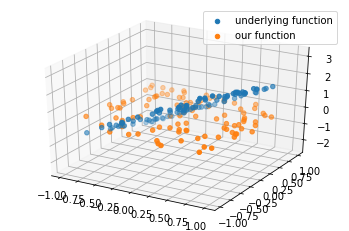

In [29]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Linear forward: (100, 2), (2, 1), (100, 1)
Epoch 0, loss 2.0326669162509368
MSE backward: (100, 1), (100, 1), (100, 1)}
Linear forward: (100, 2), (2, 1), (100, 1)
Epoch 1, loss 1.7062166158310956
MSE backward: (100, 1), (100, 1), (100, 1)}
Linear forward: (100, 2), (2, 1), (100, 1)
Epoch 2, loss 1.437501154819205
MSE backward: (100, 1), (100, 1), (100, 1)}
Linear forward: (100, 2), (2, 1), (100, 1)
Epoch 3, loss 1.2145255602354887
MSE backward: (100, 1), (100, 1), (100, 1)}
Linear forward: (100, 2), (2, 1), (100, 1)
Epoch 4, loss 1.028339556529358
MSE backward: (100, 1), (100, 1), (100, 1)}
Linear forward: (100, 2), (2, 1), (100, 1)
Epoch 5, loss 0.8721182021904373
MSE backward: (100, 1), (100, 1), (100, 1)}
Linear forward: (100, 2), (2, 1), (100, 1)
Epoch 6, loss 0.74055201579055
MSE backward: (100, 1), (100, 1), (100, 1)}
Linear forward: (100, 2), (2, 1), (100, 1)
Epoch 7, loss 0.6294365663138906
MSE backward: (100, 1), (100, 1), (100, 1)}
Linear forward: (100, 2), (2, 1), (100, 1)
E

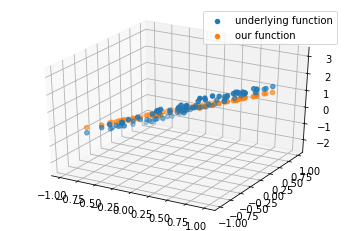

In [30]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, n_epochs: int):
    for epoch in range(n_epochs):
        y_pred = model(x)
        loss_value = loss(y_pred, y)
        print(f"Epoch {epoch}, loss {loss_value}")

        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=.1, n_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic Regression with a Multi-layer Perceptron

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


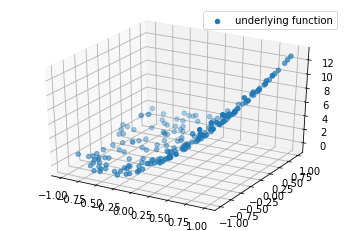

In [31]:
# Make non-linear data
n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1], ]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f"x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}")

plot_3d(x, y_true)

Linear forward: (200, 2), (2, 1), (200, 1)
Epoch 0, loss 21.271482876394256
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 1), (200, 1)
Epoch 1, loss 16.528892375354697
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 1), (200, 1)
Epoch 2, loss 13.210250665667234
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 1), (200, 1)
Epoch 3, loss 10.841611445170956
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 1), (200, 1)
Epoch 4, loss 9.114367525570907
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 1), (200, 1)
Epoch 5, loss 7.826442030034892
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 1), (200, 1)
Epoch 6, loss 6.844558405185364
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 1), (200, 1)
Epoch 7, loss 6.08001123866748
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 1), (200, 1)
Ep

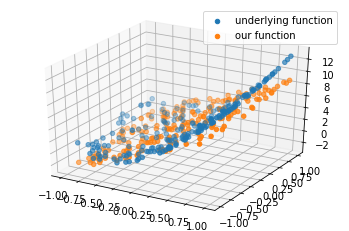

In [32]:
# Training with MSE will just fine, but the final loss will remain high as the linear function isn't capable of
# of representing the data

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=.1, n_epochs=40)
plot_3d(x, y_true, linear(x))

## Add non-linearity: ReLU

In [33]:
# In order to learn non-linear funciton, we need non-linearities in the model

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        
        return self.output

    def backward(self, output_gradient):
        self.input_gradient = (self.input_ > 0) * output_gradient

        return self.input_gradient

relu = Relu()
input_ = np.expand_dims(np.array([1, .5, 0, -.5, -1]), -1)

print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


## Train our new non-linear model

In [36]:
class Model:
    def __init__(self, input_dim, num_hidden):
        self.linear1 = Linear(input_dim, num_hidden)
        self.relu = Relu()
        self.linear2 = Linear(num_hidden, 1)

    def __call__(self, x):
        l1 = self.linear1(x)
        r = self.relu(l1)
        l2 = self.linear2(r)

        return l2

    def backward(self, output_gradient):
        linear2_gradient = self.linear2.backward(output_gradient)
        relu_gradient = self.relu.backward(linear2_gradient)
        linear1_gradient = self.linear1.backward(relu_gradient)

        return linear1_gradient

    def update(self, lr):
        self.linear2.update(lr)
        self.linear1.update(lr)

Linear forward: (200, 2), (2, 10), (200, 10)
Linear forward: (200, 10), (10, 1), (200, 1)
MSE backward: (200, 1), (200, 1), (200, 1)}
25.217956197137127


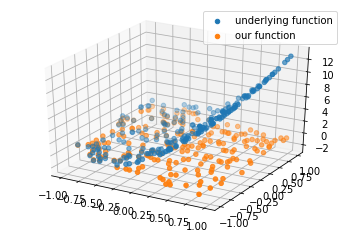

In [37]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)

loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)

model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

Linear forward: (200, 2), (2, 10), (200, 10)
Linear forward: (200, 10), (10, 1), (200, 1)
Epoch 0, loss 25.217956197137127
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 10), (200, 10)
Linear forward: (200, 10), (10, 1), (200, 1)
Epoch 1, loss 14.677124183809488
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 10), (200, 10)
Linear forward: (200, 10), (10, 1), (200, 1)
Epoch 2, loss 9.410550537980466
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 10), (200, 10)
Linear forward: (200, 10), (10, 1), (200, 1)
Epoch 3, loss 3.3423124944802014
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 10), (200, 10)
Linear forward: (200, 10), (10, 1), (200, 1)
Epoch 4, loss 1.2935194698610646
MSE backward: (200, 1), (200, 1), (200, 1)}
Linear forward: (200, 2), (2, 10), (200, 10)
Linear forward: (200, 10), (10, 1), (200, 1)
Epoch 5, loss 0.8982718832153301
MSE backward: (200, 1), (200, 1), (200, 1)}

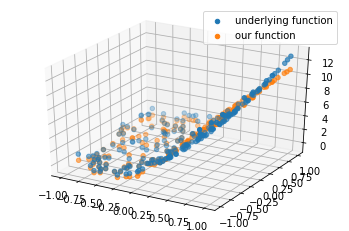

In [38]:
fit(x, y_true, model=model, loss=loss, lr=.1, n_epochs=30)
plot_3d(x, y_true, model(x))

## Pytorch approach

In [39]:
import torch
import torch.nn as nn

class TorchModel(nn.Module):
    def __init__(self, input_dim, num_hidden):
        super().__init__()

        self.linear1 = nn.Linear(input_dim, num_hidden)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hidden, 1)

    def forward(self, x):
        l1 = self.linear1(x)
        r = self.relu(l1)
        l2 = self.linear2(r)

        return l2

tensor(19.7213, grad_fn=<MseLossBackward>)


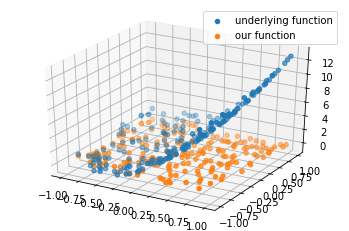

In [41]:
loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)

print(loss_value)
plot_3d(x_tensor, y_true_tensor, model(x_tensor).detach())

In [43]:
# Test 1 forwad and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(19.7213, grad_fn=<MseLossBackward>)
tensor(15.4582, grad_fn=<MseLossBackward>)


tensor(15.4582, grad_fn=<MseLossBackward>)
tensor(12.2657, grad_fn=<MseLossBackward>)
tensor(9.1460, grad_fn=<MseLossBackward>)
tensor(6.4571, grad_fn=<MseLossBackward>)
tensor(4.5847, grad_fn=<MseLossBackward>)
tensor(3.3350, grad_fn=<MseLossBackward>)
tensor(2.5024, grad_fn=<MseLossBackward>)
tensor(1.9099, grad_fn=<MseLossBackward>)
tensor(1.4792, grad_fn=<MseLossBackward>)
tensor(1.1716, grad_fn=<MseLossBackward>)
tensor(0.9557, grad_fn=<MseLossBackward>)
tensor(0.8040, grad_fn=<MseLossBackward>)
tensor(0.6969, grad_fn=<MseLossBackward>)
tensor(0.6210, grad_fn=<MseLossBackward>)
tensor(0.5656, grad_fn=<MseLossBackward>)
tensor(0.5248, grad_fn=<MseLossBackward>)
tensor(0.4926, grad_fn=<MseLossBackward>)
tensor(0.4668, grad_fn=<MseLossBackward>)
tensor(0.4446, grad_fn=<MseLossBackward>)
tensor(0.4259, grad_fn=<MseLossBackward>)
tensor(0.4094, grad_fn=<MseLossBackward>)
tensor(0.3949, grad_fn=<MseLossBackward>)
tensor(0.3820, grad_fn=<MseLossBackward>)
tensor(0.3702, grad_fn=<MseLossB

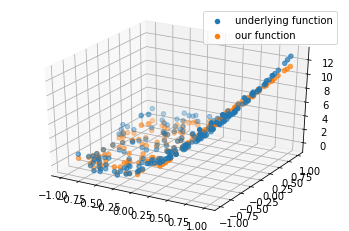

In [44]:
# Run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        y_pred_tensor = model(x_tensor)
        loss_value = loss(y_pred_tensor, y_true_tensor)
        print(loss_value)

        loss_value.backward()
        optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=.1, num_epochs=30)
plot_3d(x, y_true, model(x_tensor).detach())

## Tensorflow approach

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 1s 1ms/step - loss: 11.7909
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 1.0062
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6136
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3618
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2810
Ep

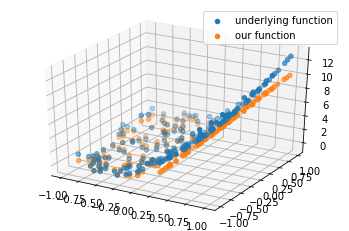

In [46]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

model.compile(loss='mse', optimizer=optimizers.SGD(.1))

model.fit(x, y_true, epochs=10)

plot_3d(x, y_true, model(x))